In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, linear_model
from scipy.stats import skew

In [2]:
df = pd.read_csv("BostonHousing.csv")
df.head()



# CRIM - per capita crime rate by town
# ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
# INDUS - proportion of non-retail business acres per town.
# CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
# NOX - nitric oxides concentration (parts per 10 million)
# RM - average number of rooms per dwelling
# AGE - proportion of owner-occupied units built prior to 1940
# DIS - weighted distances to five Boston employment centres
# RAD - index of accessibility to radial highways
# TAX - full-value property-tax rate per $10,000
# PTRATIO - pupil-teacher ratio by town
# B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
# LSTAT - % lower status of the population
# MEDV - Median value of owner-occupied homes in $1000's

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [3]:
df.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

In [4]:
df.shape

(506, 14)

In [5]:
df.info()

#crim: Per capita crime rate by town.
#zn: Proportion of large residential lots (over 25,000 sq. ft.).
#indus: Proportion of non-retail business acres per town.
#Chas: Binary variable indicating if the property is near Charles River (1 for yes, 0 for no).
#nox: Concentration of nitrogen oxides in the air.
#rm: Average number of rooms per dwelling.
#age: Proportion of old owner-occupied units built before 1940.
#dis: Weighted distances to Boston employment centers.
#rad: Index of accessibility to radial highways.
#tax: Property tax rate per $10,000

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [6]:
df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
df.isna().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
medv       0
dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
linear_regression = linear_model.LinearRegression()

In [10]:
X = df.drop(['medv'], axis = 1)
X

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48


In [11]:
y = df["medv"]
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [13]:
linear_regression.fit(X_train, y_train)

LinearRegression()

In [14]:
y_predicted = linear_regression.predict(X_test)
print(y_test.mean())
print(y_test.shape)
print(y_predicted.shape)

22.400000000000002
(102,)
(102,)


In [15]:
from sklearn.metrics import r2_score, mean_squared_error

In [16]:
y_train_predicted = linear_regression.predict(X_train)
rmse = (np.sqrt(mean_squared_error(y_train, y_train_predicted)))
r2 = r2_score(y_train, y_train_predicted)

print("The model performance for training set:")
print("--------------------------------------")
print("RSME is {}".format(rmse))
print("R2 Score is {}".format(r2))

The model performance for training set:
--------------------------------------
RSME is 4.727977982267025
R2 Score is 0.7343084505740807


In [17]:
y_test_predicted = linear_regression.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, y_test_predicted)))
r2 = r2_score(y_test, y_test_predicted)

print("The model performance for testing set")
print("-------------------------------------")
print("RSME is {}".format(rmse))
print("R2 Score is {}".format(r2))


The model performance for testing set
-------------------------------------
RSME is 4.594238460525192
R2 Score is 0.7532128552896534


In [18]:
linear_regression.coef_

array([-8.91653108e-02,  3.97748272e-02,  2.58021720e-02,  1.58470002e+00,
       -1.59858914e+01,  4.18009600e+00, -4.28416085e-03, -1.39580123e+00,
        3.06926039e-01, -1.30095404e-02, -9.13919884e-01,  1.26902647e-02,
       -4.83354527e-01])

In [19]:
linear_regression.intercept_

31.036973739285987

In [20]:
linear_regression.score(X_test, y_test)

0.7532128552896534

In [21]:
X_train_1d = X_train.values.flatten()
X_train_1d.shape

(5252,)

<Axes: xlabel='medv', ylabel='Density'>

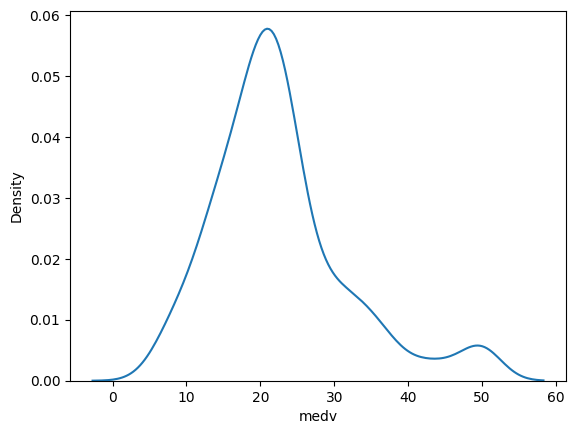

In [22]:
sns.kdeplot(y_train)

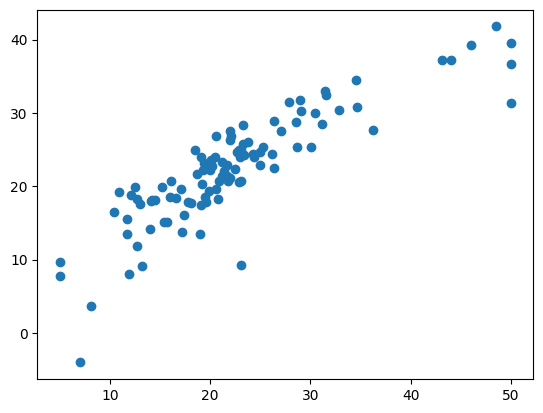

In [23]:
plt.scatter(y_test,y_test_predicted)

<Axes: xlabel='crim', ylabel='medv'>

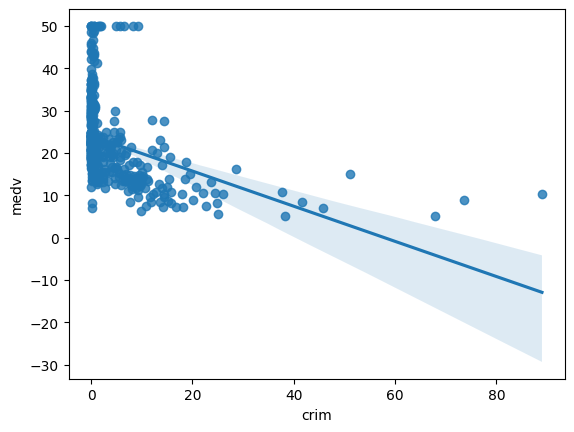

In [24]:
sns.regplot(x=df['crim'],y=df['medv'],data=df)

Without using built-in library sklearn's linear_model

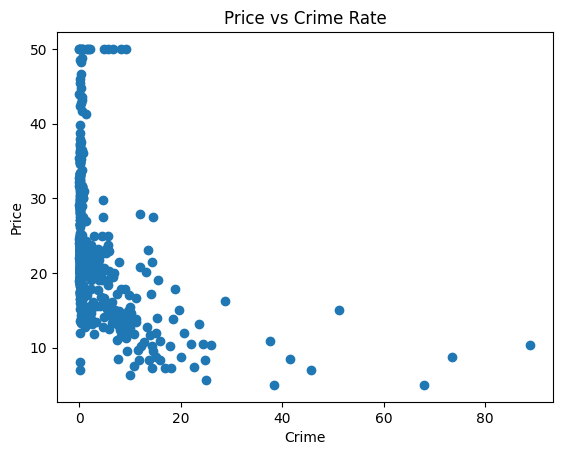

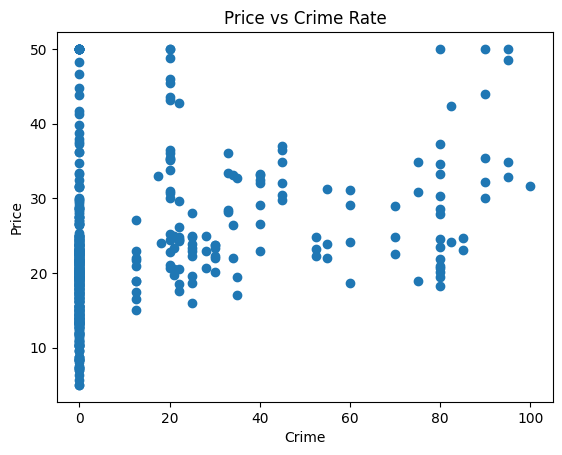

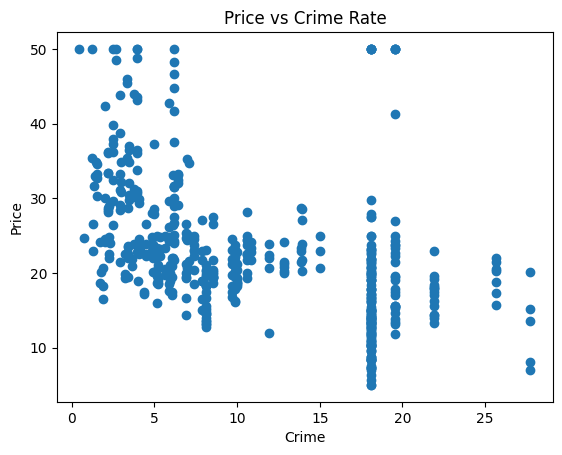

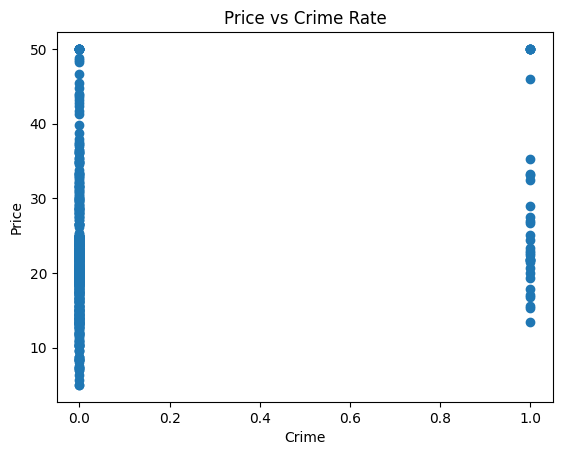

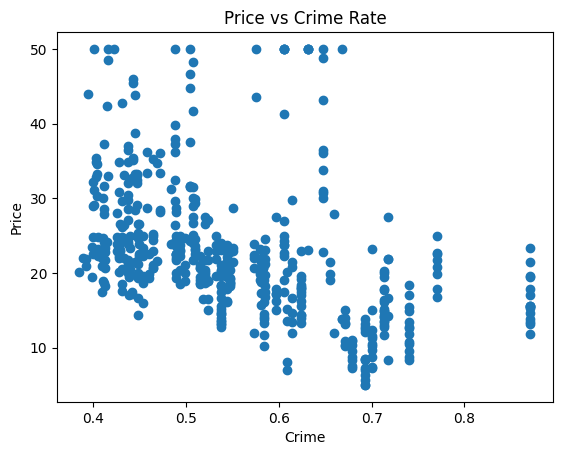

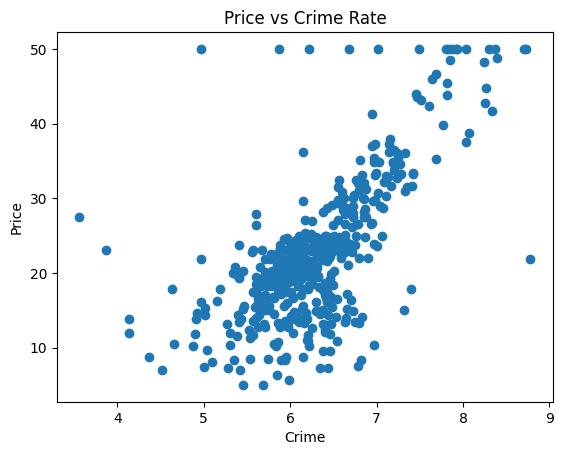

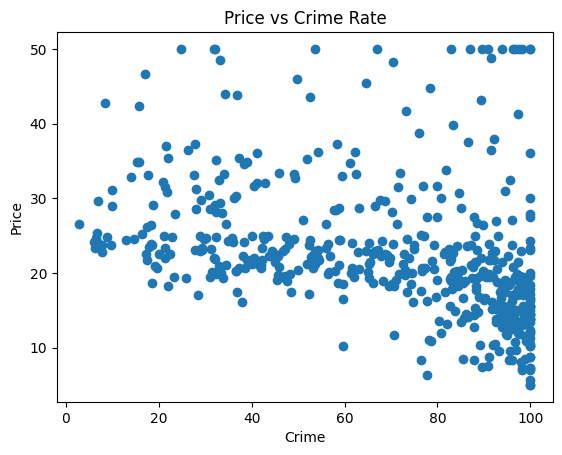

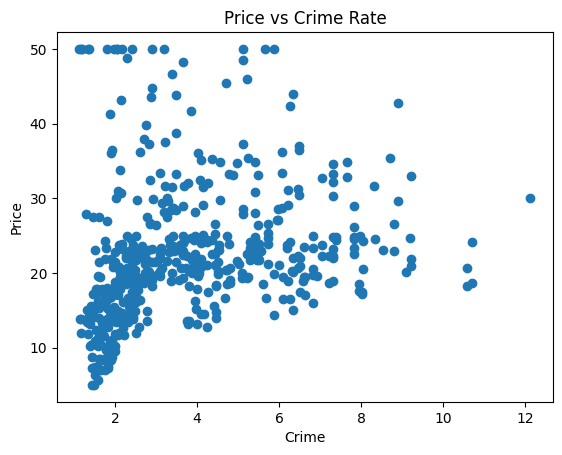

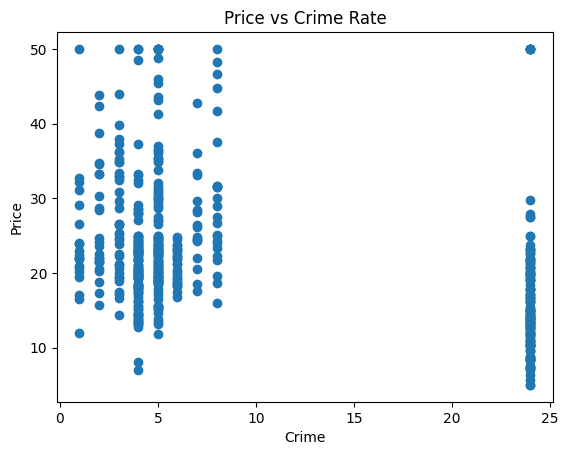

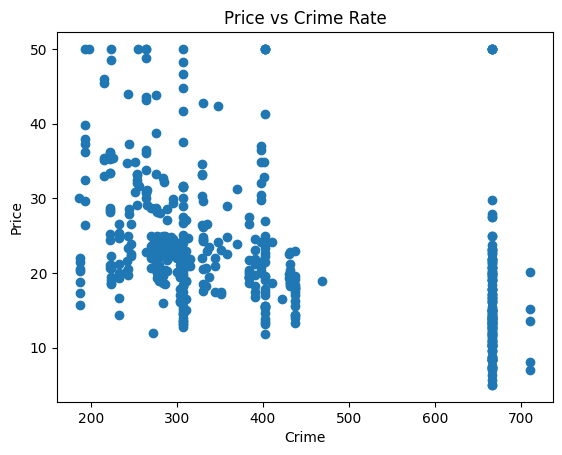

In [25]:
columns = ["crim", "zn", "indus", "chas", "nox", "rm", "age", "dis", "rad", "tax"]
for column in columns:
  plt.scatter(df[column], df['medv'])
  plt.xlabel('Crime')
  plt.ylabel('Price')
  plt.title('Price vs Crime Rate')
  plt.show()

In [26]:
y_train.shape

(404,)

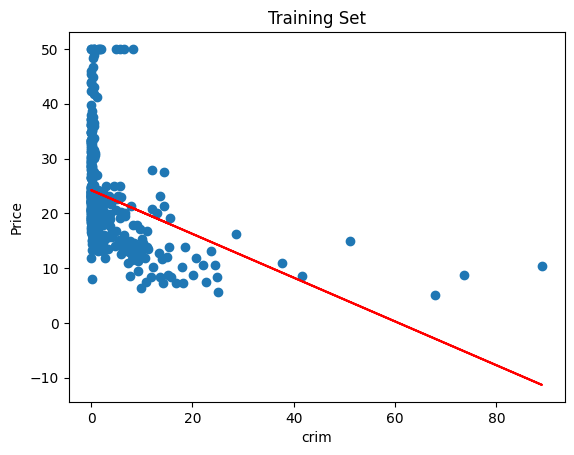

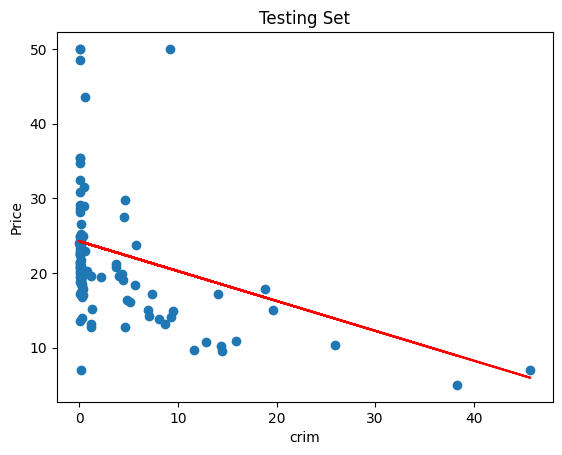

ERROR: 
 rss:  6292.8020204774 
 mae:  5.63105169555635
------------------------------------------


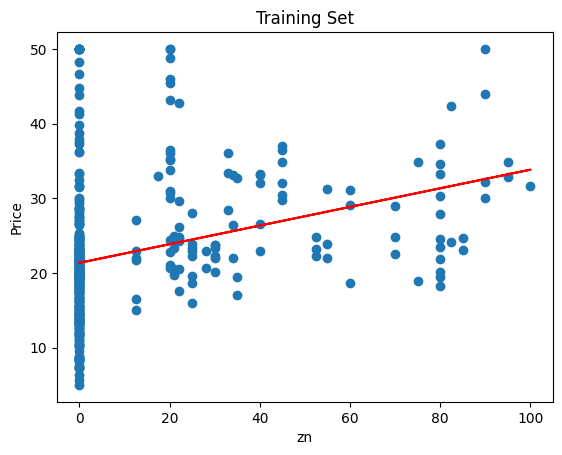

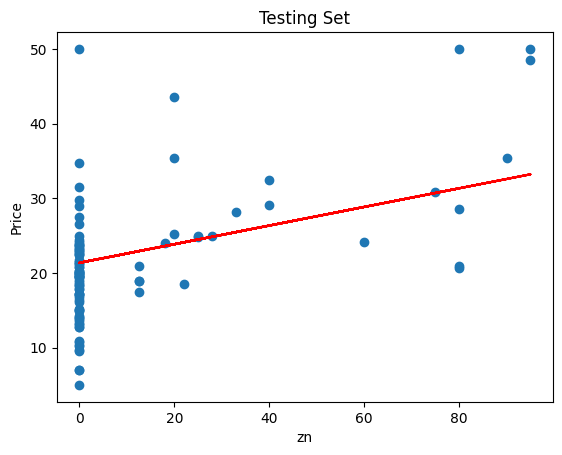

ERROR: 
 rss:  5543.440289953054 
 mae:  5.309345597011306
------------------------------------------


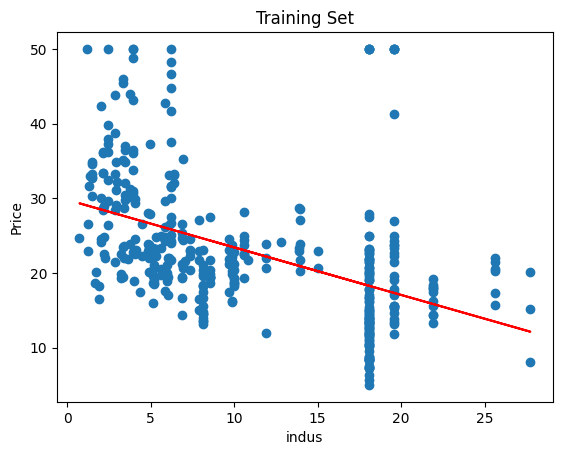

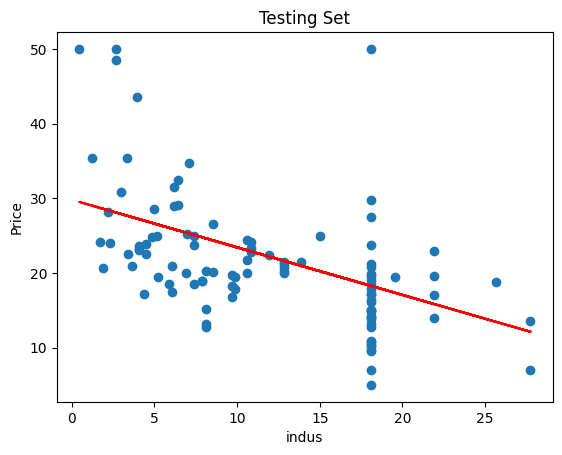

ERROR: 
 rss:  5412.501942935732 
 mae:  5.249579030981405
------------------------------------------


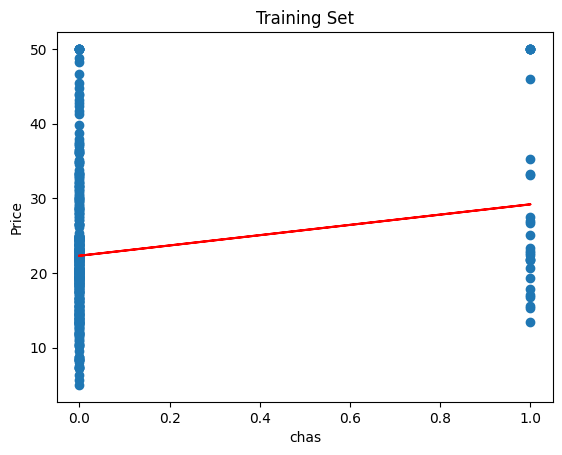

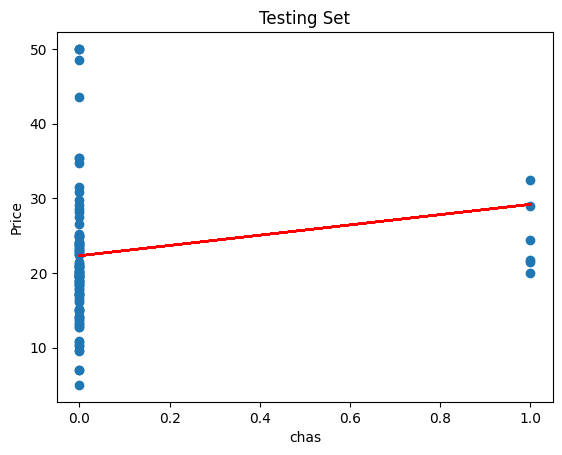

ERROR: 
 rss:  7622.909335837526 
 mae:  6.2196316430020255
------------------------------------------


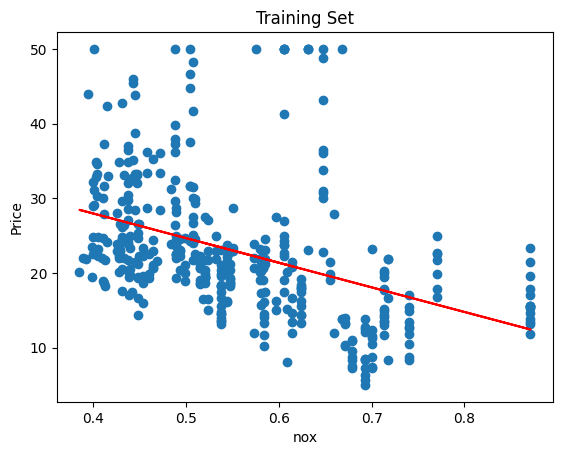

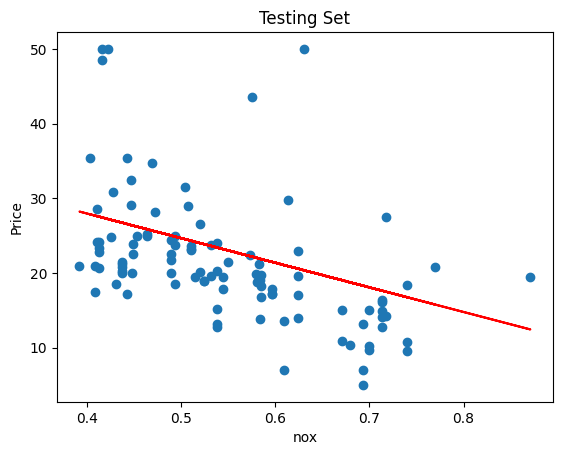

ERROR: 
 rss:  5945.103245104516 
 mae:  5.69536459057555
------------------------------------------


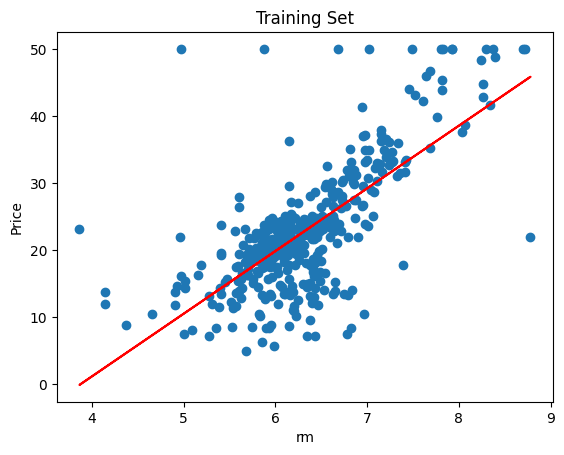

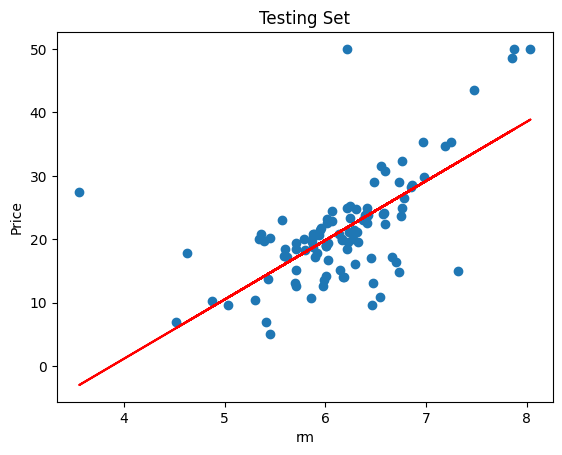

ERROR: 
 rss:  4706.767085426349 
 mae:  4.478335832064146
------------------------------------------


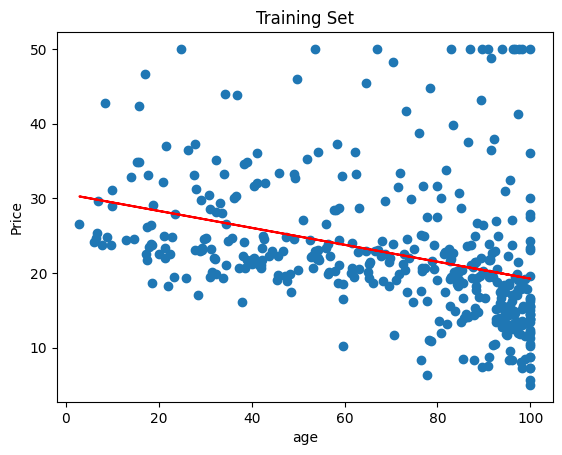

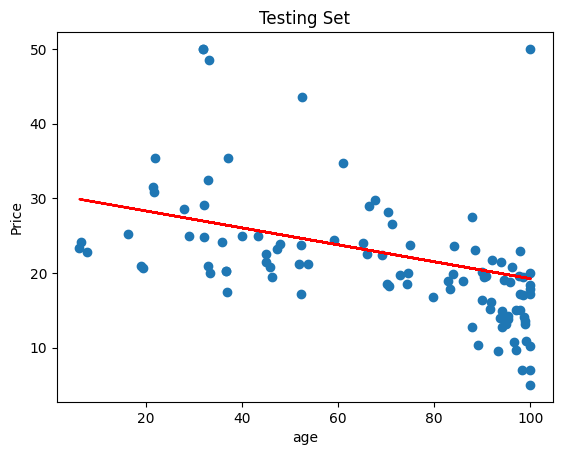

ERROR: 
 rss:  5684.723325308951 
 mae:  5.335749332662089
------------------------------------------


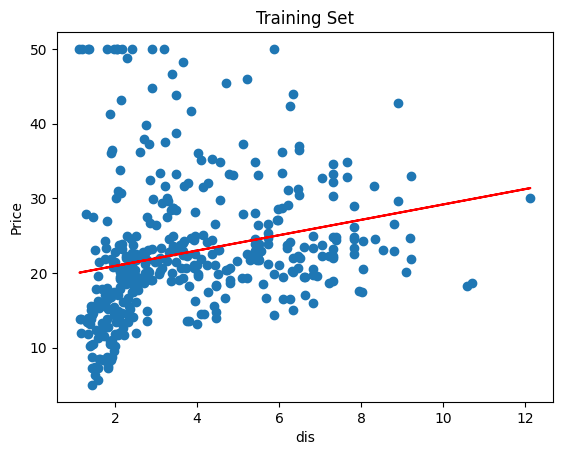

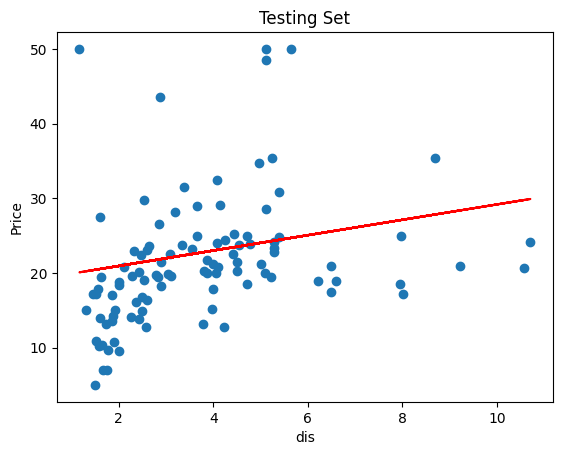

ERROR: 
 rss:  6931.605771460022 
 mae:  5.9678461185189695
------------------------------------------


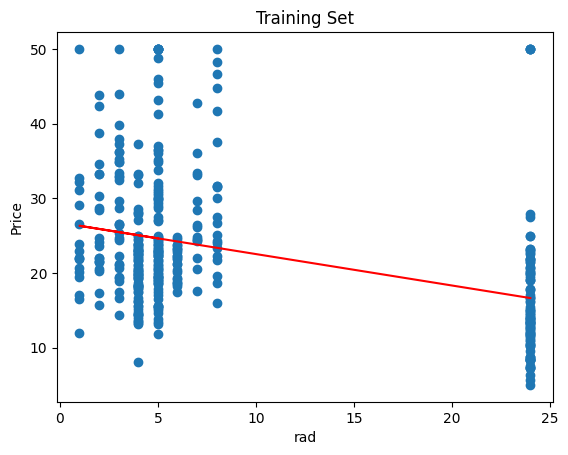

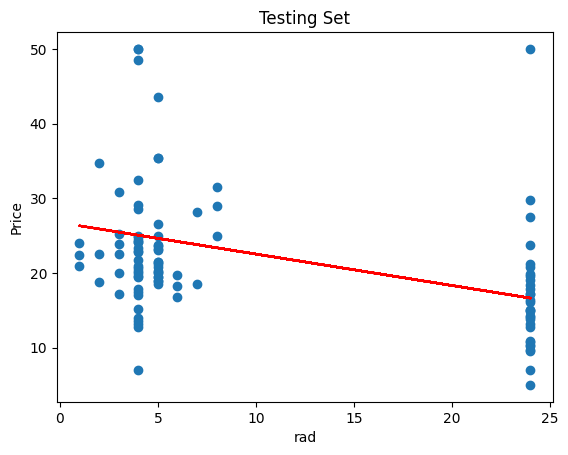

ERROR: 
 rss:  6696.477736101082 
 mae:  5.824226134142756
------------------------------------------


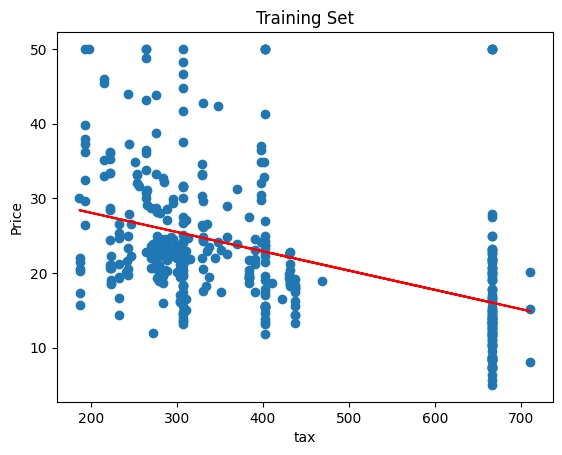

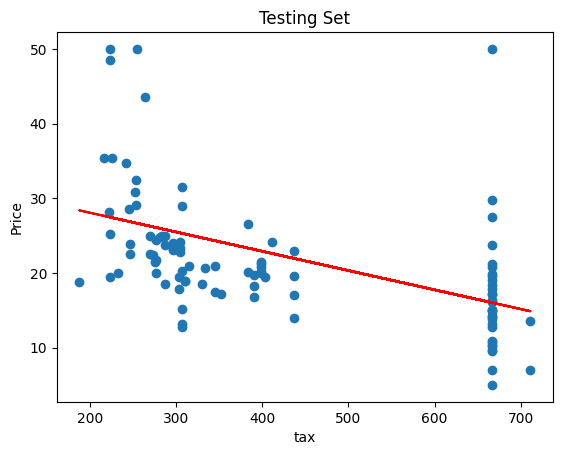

ERROR: 
 rss:  5675.079046209881 
 mae:  5.318716334713493
------------------------------------------


In [27]:
# for multiple columns
def calculate_slope_intercept(X_train, Y_train, col):
  X_sum = X_train[col].sum()
  Y_sum = Y_train.sum()
  X2_sum = (X_train[col]**2).sum()
  XY_sum = (X_train[col] * Y_train).sum()
  n = 404

  m = ((n*XY_sum) - (X_sum * Y_sum))/((n * X2_sum) - (X_sum * X_sum))
  c = ((Y_sum * X2_sum) - (X_sum * XY_sum))/((n * X2_sum) - (X_sum * X_sum))

  #Plotting Graph

  #Training Set
  plt.scatter(X_train[col], Y_train, label='Scatter Plot')

  # Line plot
  x_values = X_train[col]
  y_values = m * x_values + c
  plt.plot(x_values, y_values, color='red', label='Line: y = {}x + {}'.format(m, c))

  plt.title('Training Set')
  plt.xlabel(col)
  plt.ylabel('Price')

  plt.show()

  #Testing Set
  plt.scatter(X_test[col], Y_test, label='Scatter Plot')

  # Line plot
  x_values = X_test[col]
  y_values = m * x_values + c
  plt.plot(x_values, y_values, color='red', label='Line: y = {}x + {}'.format(m, c))

  plt.title('Testing Set')
  plt.xlabel(col)
  plt.ylabel('Price')
  plt.show()

  residual = (Y_test - y_values)
  rss = (residual ** 2).sum()
  mae = (abs(residual).sum())/(len(Y_test))
  print("ERROR: \n", "rss: ", rss, "\n", "mae: ", mae)


X = df[["crim", "zn", "indus", "chas", "nox", "rm", "age", "dis", "rad", "tax"]]  # Features
Y = df['medv']  # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

for column in columns:
  calculate_slope_intercept(X_train, Y_train, column)
  print("------------------------------------------")

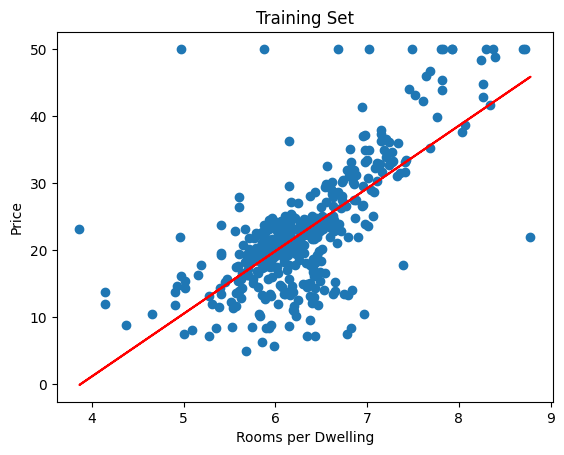

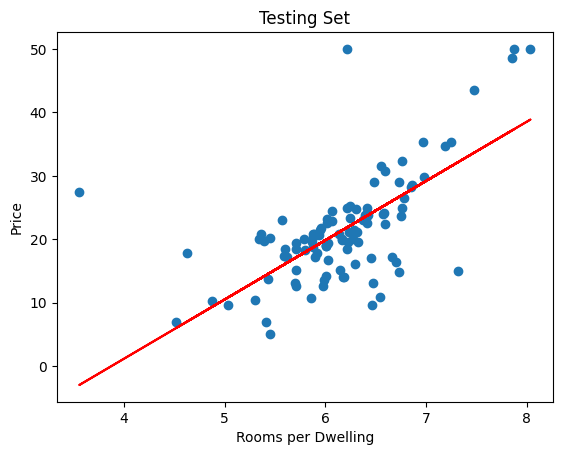

ERROR: 
 rss:  4706.767085426349 
 mae:  4.478335832064146


In [28]:
#Linear Regression based on a single feature
#Using Least Squares Method
from sklearn.model_selection import train_test_split

X = df[["crim", "zn", "indus", "chas", "nox", "rm", "age", "dis", "rad", "tax"]]  # Features
Y = df['medv']  # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#training the model

X_sum = X_train['rm'].sum()
Y_sum = Y_train.sum()
X2_sum = (X_train['rm']**2).sum()
XY_sum = (X_train['rm'] * Y_train).sum()
n = 404

m = ((n*XY_sum) - (X_sum * Y_sum))/((n * X2_sum) - (X_sum * X_sum))
c = ((Y_sum * X2_sum) - (X_sum * XY_sum))/((n * X2_sum) - (X_sum * X_sum))

#Plotting Graph

#Training Set
plt.scatter(X_train['rm'], Y_train, label='Scatter Plot')

# Line plot
x_values = X_train['rm']
y_values = m * x_values + c
plt.plot(x_values, y_values, color='red', label='Line: y = {}x + {}'.format(m, c))

plt.title('Training Set')
plt.xlabel('Rooms per Dwelling')
plt.ylabel('Price')

plt.show()

#Testing Set
plt.scatter(X_test['rm'], Y_test, label='Scatter Plot')

# Line plot
x_values = X_test['rm']
y_values = m * x_values + c
plt.plot(x_values, y_values, color='red', label='Line: y = {}x + {}'.format(m, c))

plt.title('Testing Set')
plt.xlabel('Rooms per Dwelling')
plt.ylabel('Price')
plt.show()

residual = (Y_test - y_values)
rss = (residual ** 2).sum()
mae = (abs(residual).sum())/(len(Y_test))
print("ERROR: \n", "rss: ", rss, "\n", "mae: ", mae)

In [29]:
np.mean(df)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3502: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


crim         3.613524
zn          11.363636
indus       11.136779
chas         0.069170
nox          0.554695
rm           6.284634
age         68.574901
dis          3.795043
rad          9.549407
tax        408.237154
ptratio     18.455534
b          356.674032
lstat       12.653063
medv        22.532806
dtype: float64

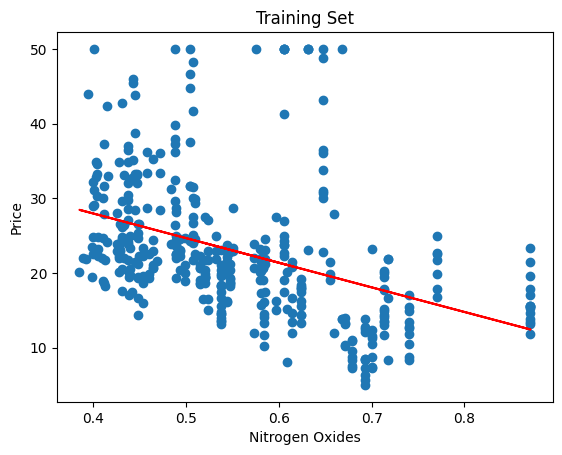

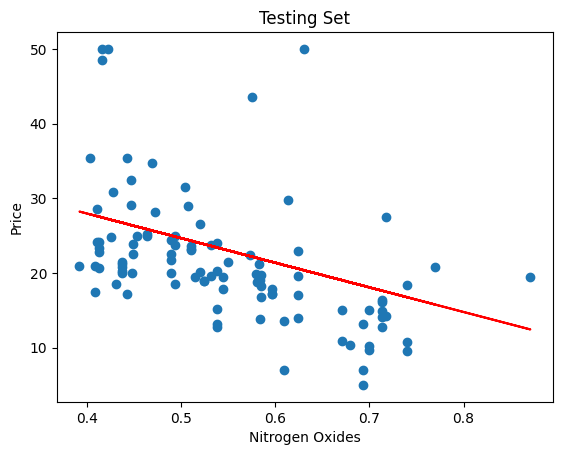

ERROR: 
 rss:  5945.103245104516 
 mae:  5.69536459057555


In [31]:
#Linear Regression based on a single feature
#Using Least Squares Method
from sklearn.model_selection import train_test_split

X = df[["crim", "zn", "indus", "chas", "nox", "rm", "age", "dis", "rad", "tax"]]  # Features
Y = df['medv']  # Target variable

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#training the model

X_sum = X_train['nox'].sum()
Y_sum = Y_train.sum()
X2_sum = (X_train['nox']**2).sum()
XY_sum = (X_train['nox'] * Y_train).sum()
n = 404

m = ((n*XY_sum) - (X_sum * Y_sum))/((n * X2_sum) - (X_sum * X_sum))
c = ((Y_sum * X2_sum) - (X_sum * XY_sum))/((n * X2_sum) - (X_sum * X_sum))

#Plotting Graph

#Training Set
plt.scatter(X_train['nox'], Y_train, label='Scatter Plot')

# Line plot
x_values = X_train['nox']
y_values = m * x_values + c
plt.plot(x_values, y_values, color='red', label='Line: y = {}x + {}'.format(m, c))

plt.title('Training Set')
plt.xlabel('Nitrogen Oxides')
plt.ylabel('Price')

plt.show()

#Testing Set
plt.scatter(X_test['nox'], Y_test, label='Scatter Plot')

# Line plot
x_values = X_test['nox']
y_values = m * x_values + c
plt.plot(x_values, y_values, color='red', label='Line: y = {}x + {}'.format(m, c))

plt.title('Testing Set')
plt.xlabel('Nitrogen Oxides')
plt.ylabel('Price')
plt.show()

residual = (Y_test - y_values)
rss = (residual ** 2).sum()
mae = (abs(residual).sum())/(len(Y_test))
print("ERROR: \n", "rss: ", rss, "\n", "mae: ", mae)

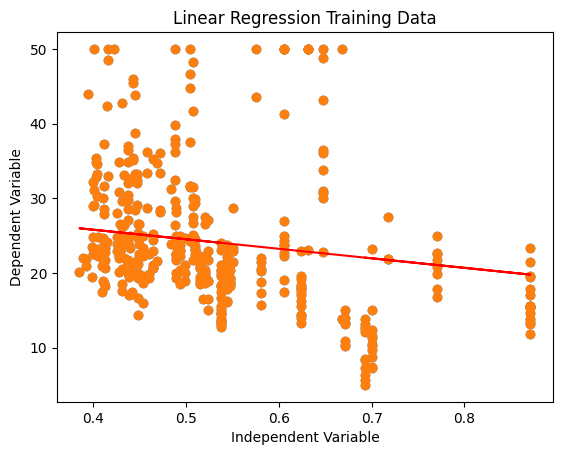

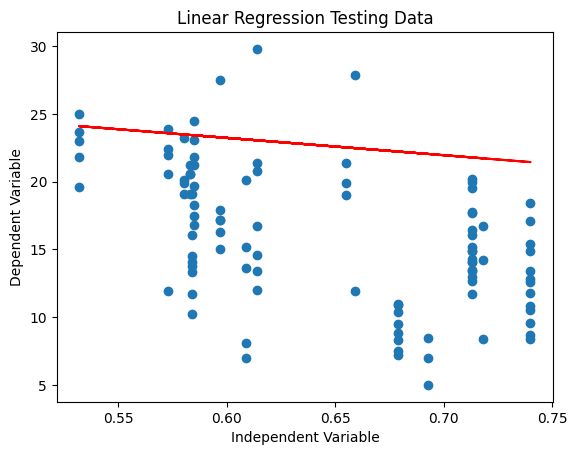

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Generate sample data

X = df['nox'].values.reshape(-1, 1)  # Reshape to ensure X is a 2D array
y = df['medv'].values.reshape(-1, 1)  # Reshape to ensure y is a 2D array

# Split data into training and testing sets
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Function to compute cost
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

# Function to perform gradient descent
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, 2))
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        theta = theta - (1 / m) * learning_rate * X.T.dot(errors)
        theta_history[i, :] = theta.T
        cost_history[i] = compute_cost(X, y, theta)
    return theta, cost_history, theta_history

# Add bias term to X
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]

# Initialize parameters for gradient descent
theta = np.random.randn(2, 1)

# Perform gradient descent
learning_rate = 0.1
iterations = 1000
theta, cost_history, theta_history = gradient_descent(X_train_bias, y_train, theta, learning_rate, iterations)

# Plot animation of line fitting the training data
fig, ax = plt.subplots()
ax.scatter(X_train, y_train)
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,

def update(frame):
    y_pred = X_train_bias.dot(theta_history[frame, :].reshape(-1, 1))
    line.set_data(X_train, y_pred)
    return line,

# Plot graph of line on training data
plt.scatter(X_train, y_train)
plt.plot(X_train, X_train_bias.dot(theta), color='red')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.title('Linear Regression Training Data')
plt.show()

# Plot graph with testing data
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]
plt.scatter(X_test, y_test)
plt.plot(X_test, X_test_bias.dot(theta), color='red')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.title('Linear Regression Testing Data')
plt.show()


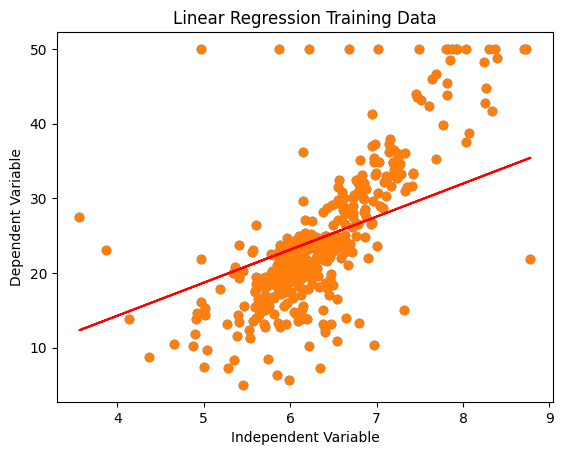

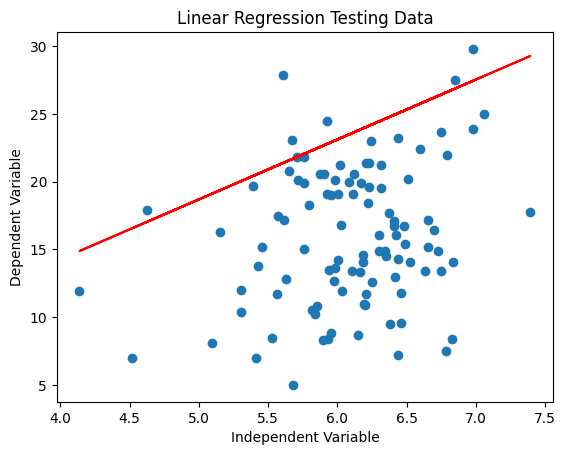

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# Generate sample data

X = df['rm'].values.reshape(-1, 1)  # Reshape to ensure X is a 2D array
y = df['medv'].values.reshape(-1, 1)  # Reshape to ensure y is a 2D array

# Split data into training and testing sets
split_index = int(len(X) * 0.8)
X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

# Function to compute cost
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    cost = (1 / (2 * m)) * np.sum(np.square(predictions - y))
    return cost

# Function to perform gradient descent
def gradient_descent(X, y, theta, learning_rate, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    theta_history = np.zeros((iterations, 2))
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        theta = theta - (1 / m) * learning_rate * X.T.dot(errors)
        theta_history[i, :] = theta.T
        cost_history[i] = compute_cost(X, y, theta)
    return theta, cost_history, theta_history

# Add bias term to X
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]

# Initialize parameters for gradient descent
theta = np.random.randn(2, 1)

# Perform gradient descent
learning_rate = 0.01
iterations = 1000
theta, cost_history, theta_history = gradient_descent(X_train_bias, y_train, theta, learning_rate, iterations)

# Plot animation of line fitting the training data
fig, ax = plt.subplots()
ax.scatter(X_train, y_train)
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,

def update(frame):
    y_pred = X_train_bias.dot(theta_history[frame, :].reshape(-1, 1))
    line.set_data(X_train, y_pred)
    return line,

# Plot graph of line on training data
plt.scatter(X_train, y_train)
plt.plot(X_train, X_train_bias.dot(theta), color='red')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.title('Linear Regression Training Data')
plt.show()

# Plot graph with testing data
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]
plt.scatter(X_test, y_test)
plt.plot(X_test, X_test_bias.dot(theta), color='red')
plt.xlabel('Independent Variable')
plt.ylabel('Dependent Variable')
plt.title('Linear Regression Testing Data')
plt.show()
